## 1. Data preprocessing

In [1]:
import pandas as pd

In [2]:
#데이터를 DataFrame에 저장
df = pd.read_csv('playtennis.csv')
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
#1열 Outlook에서 Sunny값을 int 0으로 저장
df.Outlook = df.Outlook.replace('Sunny', 0)
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,0,Mild,High,Weak,No
8,0,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
#inplace = True -> df에 저장하지 않아도 자동으로 바뀜
df.Outlook.replace('Overcast', 1, inplace = True)
df.Outlook.replace('Rain', 2, inplace = True)
#df['Outlook'].replace('Rain', 2, inplace = True)과 동일
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes
5,2,Cool,Normal,Strong,No
6,1,Cool,Normal,Strong,Yes
7,0,Mild,High,Weak,No
8,0,Cool,Normal,Weak,Yes
9,2,Mild,Normal,Weak,Yes


In [5]:
df.Temperature.replace('Hot', 1, inplace = True)
df.Temperature.replace('Mild', 2, inplace = True)
df.Temperature.replace('Cool', 3, inplace = True)
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,High,Weak,No
1,0,1,High,Strong,No
2,1,1,High,Weak,Yes
3,2,2,High,Weak,Yes
4,2,3,Normal,Weak,Yes
5,2,3,Normal,Strong,No
6,1,3,Normal,Strong,Yes
7,0,2,High,Weak,No
8,0,3,Normal,Weak,Yes
9,2,2,Normal,Weak,Yes


In [6]:
df.Humidity.replace('High', 1, inplace = True)
df.Humidity.replace('Normal', 2, inplace = True)

In [7]:
df.Wind.replace('Weak', 1, inplace = True)
df.Wind.replace('Strong', 2, inplace = True)

In [8]:
df.PlayTennis.replace('No', 1, inplace = True)
df.PlayTennis.replace('Yes', 2, inplace = True)

In [9]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2
5,2,3,2,2,1
6,1,3,2,2,2
7,0,2,1,1,1
8,0,3,2,1,2
9,2,2,2,1,2


In [10]:
#feature 추출해서 X에 저장
X = df.loc[:, 'Outlook':'Wind']

In [11]:
#target 추출해서 y에 저장
y = df.loc[:, 'PlayTennis']

In [12]:
#series 타입으로 리턴
df['PlayTennis']

0     1
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    2
11    2
12    2
13    1
Name: PlayTennis, dtype: int64

In [13]:
#PlayTennis 열이 있는 DataFrame 리턴
df[['PlayTennis']]

,PlayTennis
0,1
1,1
2,2
3,2
4,2
5,1
6,2
7,1
8,2
9,2


## 2. Model fitting

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

In [30]:
dt_prediction = dt.predict(X_test)

In [31]:
dt_prediction

array([2, 2, 1], dtype=int64)

In [32]:
y_test

array([[2],
       [2],
       [2]], dtype=int64)

In [33]:
acc = accuracy_score(y_test, dt_prediction)
print('정확도:', acc * 100, '%')

정확도: 66.66666666666666 %


In [36]:
import numpy as np
X = np.array(pd.DataFrame(df, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(df, columns = ['PlayTennis']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
dt2 = DecisionTreeClassifier()
dt2 = dt.fit(X_train, y_train)
dt_prediction2 = dt.predict(X_test)
acc2 = accuracy_score(y_test, dt_prediction2)
print('정확도:', acc2 * 100, '%')

정확도: 66.66666666666666 %


## 3. decision tree visualization

In [22]:
! pip install pydotplus

distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [23]:
from sklearn import tree
import pydotplus
from PIL import Image
from io import BytesIO

In [24]:
#text 형식으로 출력
#feature는 순서대로 
#class name은 종속변수 값, 작은순서대로(no = 0, yes = 1)
tree.export_graphviz(
    dt, 
    feature_names = ['Outlook', 'Temparature', 'Humidity', 'wind'],
    class_names = ['No', 'Yes']
)

'digraph Tree {\nnode [shape=box] ;\n0 [label="Humidity <= 1.5\\ngini = 0.463\\nsamples = 11\\nvalue = [4, 7]\\nclass = Yes"] ;\n1 [label="Outlook <= 0.5\\ngini = 0.444\\nsamples = 6\\nvalue = [4, 2]\\nclass = No"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]\\nclass = No"] ;\n1 -> 2 ;\n3 [label="Outlook <= 1.5\\ngini = 0.444\\nsamples = 3\\nvalue = [1, 2]\\nclass = Yes"] ;\n1 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]\\nclass = Yes"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = No"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 5]\\nclass = Yes"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

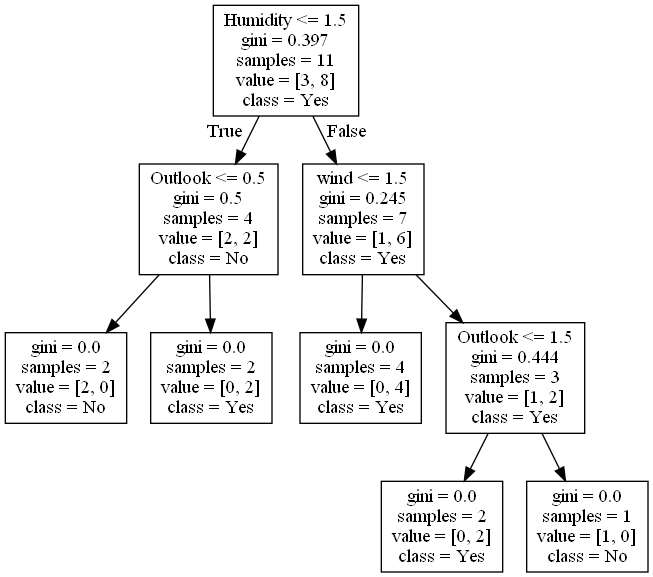

In [38]:
dt_dot_data = tree.export_graphviz(
                        dt, 
                        feature_names = ['Outlook', 'Temparature', 'Humidity', 'wind'],
                        class_names = ['No', 'Yes'],
                        #graph design 조정
                        #filled = True, rounded = True, special_characters = True
)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data).create_png()
Image.open(BytesIO(dt_graph))

In [26]:
import os
os.environ['path'] = os.environ['path'] + ':C:/Program Files/Graphviz/bin/dot.exe'

In [27]:
os.environ['path']

'C:\\Users\\Admin\\anaconda3;C:\\Users\\Admin\\anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\Admin\\anaconda3\\Library\\usr\\bin;C:\\Users\\Admin\\anaconda3\\Library\\bin;C:\\Users\\Admin\\anaconda3\\Scripts;C:\\Users\\Admin\\anaconda3\\bin;C:\\Users\\Admin\\anaconda3\\condabin;C:\\Program Files\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\Intel\\WiFi\\bin;C:\\Program Files\\Common Files\\Intel\\WirelessCommon;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\